In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_train = pd.read_csv('../input/titanic/train.csv')

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
feature_columns = [ 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Embarked']
X_train = data_train[feature_columns]
Y_train = data_train['Survived']
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
def TranSex(Sex) :
    if Sex == "male":
        return 1
    elif Sex == "female":
        return 0
    else :
        return 2
def TranEmbarked(Embarked) :
    if Embarked == 'C' :
        return 0
    elif Embarked == 'Q':
        return 1
    else :
        return 2

In [9]:
X_train.loc[:,'Sex'] = X_train.loc[:,'Sex'].apply(TranSex)
X_train.loc[:,'Embarked'] = X_train.loc[:,'Embarked'].apply(TranEmbarked)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
X_train = X_train.fillna(X_train['Age'].mean())

In [11]:
X_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


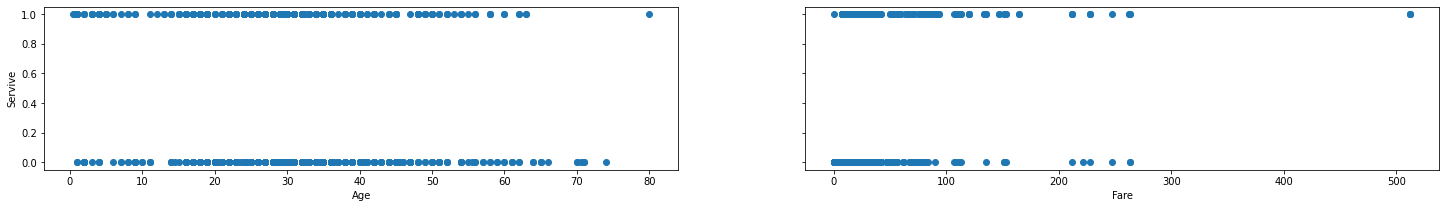

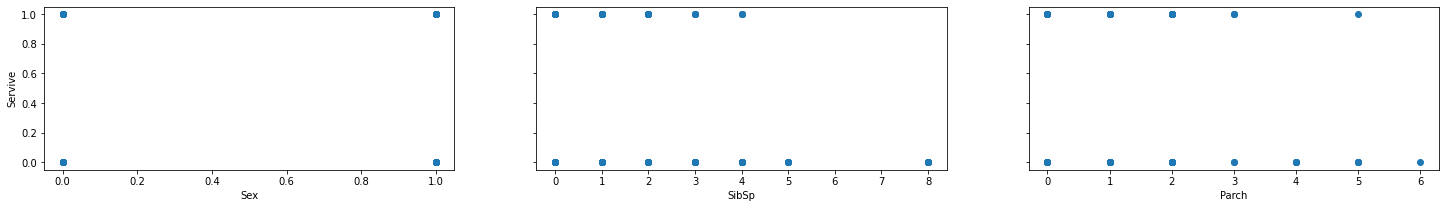

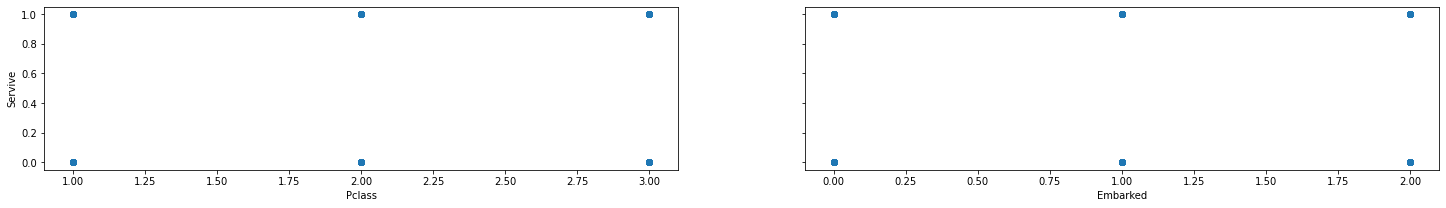

In [13]:
fig,ax1=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
fig,ax2=plt.subplots(1, 3, figsize=(25, 3), sharey=True)
fig,ax3=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
i=0
for feature in ['Age' , 'Fare']:
    ax1[i].scatter(X_train[feature],Y_train)
    ax1[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Sex' , 'SibSp' ,'Parch']:
    ax2[i].scatter(X_train[feature],Y_train)
    ax2[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Pclass' , 'Embarked'] :
    ax3[i].scatter(X_train[feature],Y_train)
    ax3[i].set_xlabel(feature)
    i+=1
ax1[0].set_ylabel("Servive")
ax2[0].set_ylabel("Servive")
ax3[0].set_ylabel("Servive")
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)

LogisticRegression()

In [15]:
Y_pred = lr_model.predict(X_train)

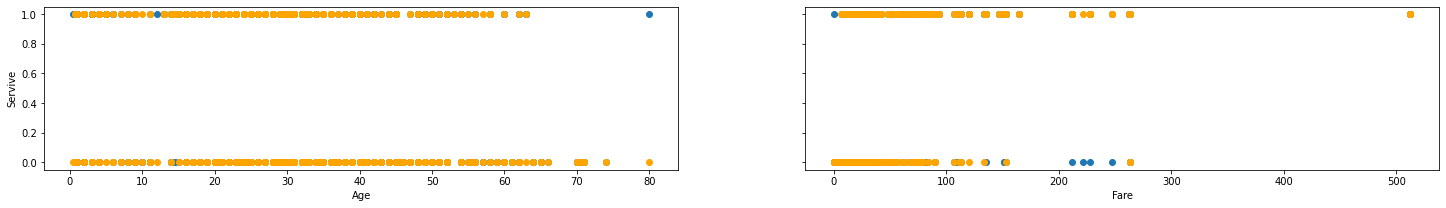

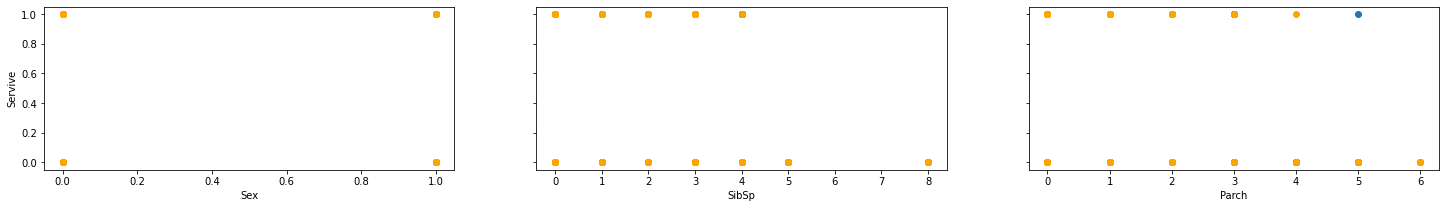

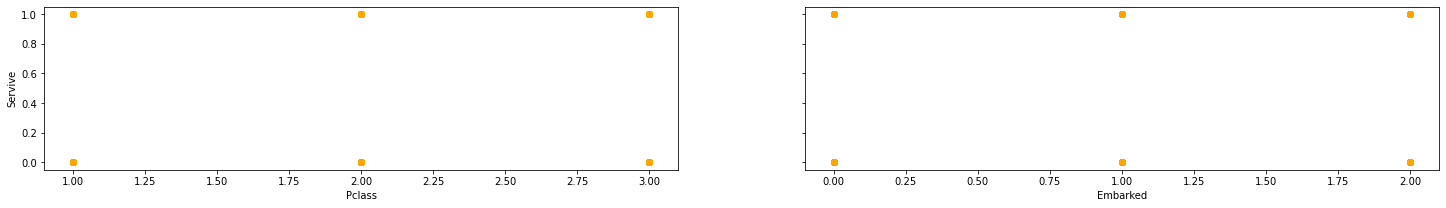

In [16]:
fig,ax1=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
fig,ax2=plt.subplots(1, 3, figsize=(25, 3), sharey=True)
fig,ax3=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
i=0
for feature in ['Age' , 'Fare']:
    ax1[i].scatter(X_train[feature],Y_train)
    ax1[i].scatter(X_train[feature],Y_pred ,color='orange')
    ax1[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Sex' , 'SibSp' ,'Parch']:
    ax2[i].scatter(X_train[feature],Y_train)
    ax2[i].scatter(X_train[feature],Y_pred ,color='orange')
    ax2[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Pclass' , 'Embarked'] :
    ax3[i].scatter(X_train[feature],Y_train)
    ax3[i].scatter(X_train[feature],Y_pred ,color= 'orange')
    ax3[i].set_xlabel(feature)
    i+=1
ax1[0].set_ylabel("Servive")
ax2[0].set_ylabel("Servive")
ax3[0].set_ylabel("Servive")
plt.show()

In [17]:
print("Accuracy on training set:", lr_model.score(X_train, Y_train))

Accuracy on training set: 0.8002244668911336


In [18]:
data_test = pd.read_csv('../input/titanic/test.csv')

In [19]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
X_test = data_test[feature_columns]

In [21]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [22]:
X_test.loc[:,'Sex'] = X_test.loc[:,'Sex'].apply(TranSex)
X_test.loc[:,'Embarked'] = X_test.loc[:,'Embarked'].apply(TranEmbarked)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [23]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [24]:
X_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [25]:
X_test = X_test.fillna(X_test['Age'].mean())

In [26]:
X_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
Y_test = lr_model.predict(X_test)

In [28]:
pd.DataFrame({ 'PassengerId' : data_test['PassengerId'] ,'Survived' : Y_test}).to_csv("./file.csv")

In [29]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return X_norm

In [30]:
X_train = X_train.apply(zscore_normalize_features)
#X_test = X_test.apply(zscore_normalize_features)

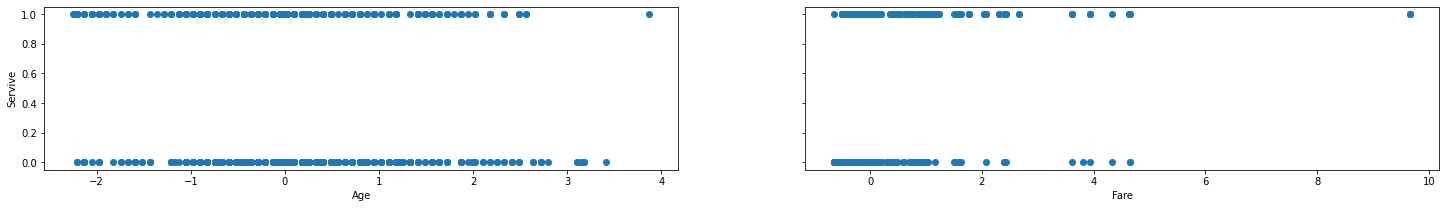

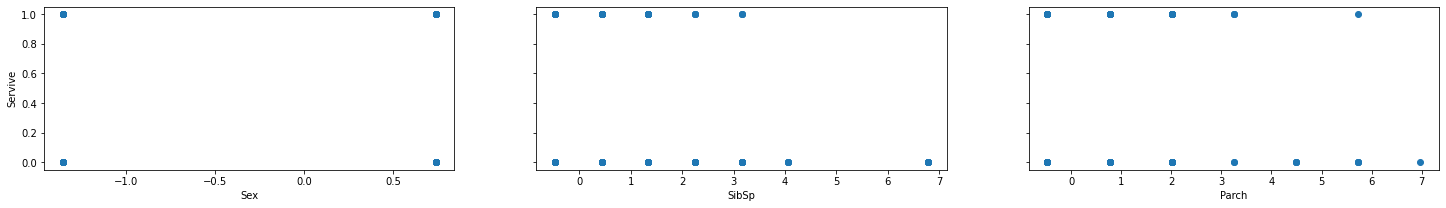

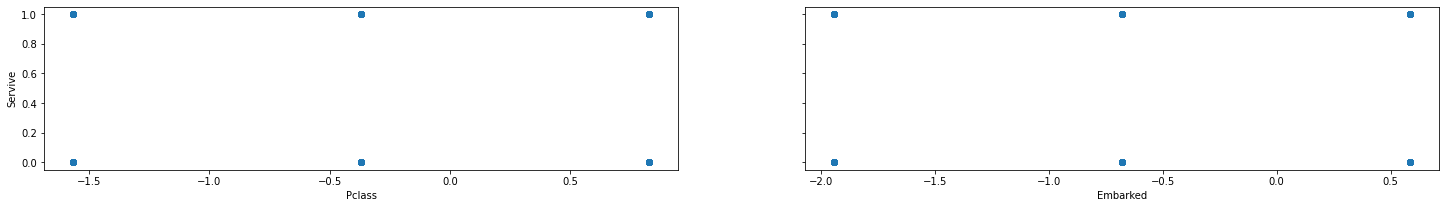

In [31]:
fig,ax1=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
fig,ax2=plt.subplots(1, 3, figsize=(25, 3), sharey=True)
fig,ax3=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
i=0
for feature in ['Age' , 'Fare']:
    ax1[i].scatter(X_train[feature],Y_train)
    ax1[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Sex' , 'SibSp' ,'Parch']:
    ax2[i].scatter(X_train[feature],Y_train)
    ax2[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Pclass' , 'Embarked'] :
    ax3[i].scatter(X_train[feature],Y_train)
    ax3[i].set_xlabel(feature)
    i+=1
ax1[0].set_ylabel("Servive")
ax2[0].set_ylabel("Servive")
ax3[0].set_ylabel("Servive")
plt.show()

In [32]:
lr_model2 = LogisticRegression()
lr_model2.fit(X_train, Y_train)
Y_pred = lr_model.predict(X_train)

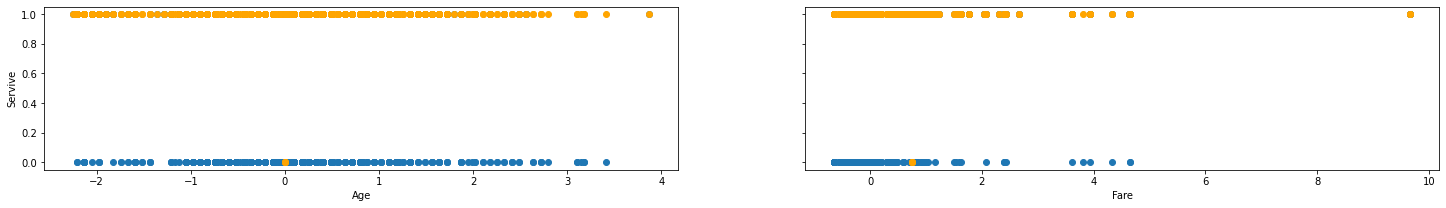

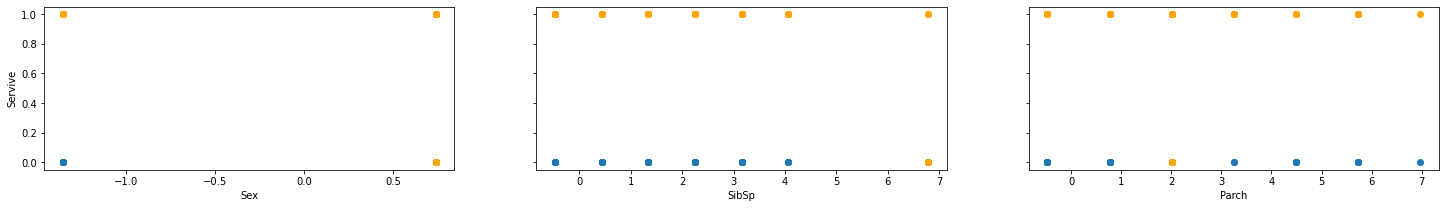

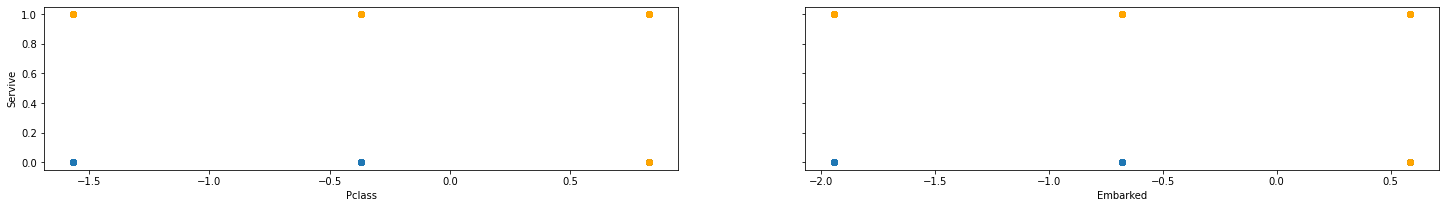

In [33]:
fig,ax1=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
fig,ax2=plt.subplots(1, 3, figsize=(25, 3), sharey=True)
fig,ax3=plt.subplots(1, 2, figsize=(25, 3), sharey=True)
i=0
for feature in ['Age' , 'Fare']:
    ax1[i].scatter(X_train[feature],Y_train)
    ax1[i].scatter(X_train[feature],Y_pred ,color='orange')
    ax1[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Sex' , 'SibSp' ,'Parch']:
    ax2[i].scatter(X_train[feature],Y_train)
    ax2[i].scatter(X_train[feature],Y_pred ,color='orange')
    ax2[i].set_xlabel(feature)
    i+=1
i=0
for feature in ['Pclass' , 'Embarked'] :
    ax3[i].scatter(X_train[feature],Y_train)
    ax3[i].scatter(X_train[feature],Y_pred ,color= 'orange')
    ax3[i].set_xlabel(feature)
    i+=1
ax1[0].set_ylabel("Servive")
ax2[0].set_ylabel("Servive")
ax3[0].set_ylabel("Servive")
plt.show()